In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier


In [2]:
import pandas as pd
import numpy as np
dataset = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataset['Unnamed: 0']
del dataset['event_date']
dataset.loc[dataset['labels'] != 0, 'labels'] = 1
dataset.loc[dataset['labels'] == 0, 'labels'] = 0
print(dataset)


data = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del data['Unnamed: 0']
del data['event_date']
del data['labels']
print(data)

       response_time  response_size  session_duration  response_errorcode_num  \
0             718444      750197670                 2                       0   
1            1051741      794574705                 1                       0   
2             666003      445975743                 0                       0   
3             939968      342481634                 0                       0   
4            1059742      316304423                 0                       0   
...              ...            ...               ...                     ...   
61339        1654815      986044166                 2                       0   
61340        1080735      942590486                 0                       0   
61341        1266569      887658828                 4                       0   
61342         555966      850409314                 0                       0   
61343        1603774     1005933723                 2                       0   

       response_failure_num

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, dataset['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [4]:
X_train

,response_time,response_size,session_duration,response_errorcode_num,response_failure_num
31891,5448457,482477988,3,0,0
5526,1386061,730136162,5,0,0
29091,1103949,446108409,0,0,0
32324,4530654,706178616,6,6,6
6834,957631,365775466,4,0,0
...,...,...,...,...,...
58162,2625188,205247093,3,0,0
20511,1509618,504459614,2,0,0
12243,1040176,140167994,1,0,0
276,712100,377485393,3,0,0


## KNN

In [5]:
from sklearn import datasets
import pandas as pd
datasetknn = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasetknn['Unnamed: 0']
del datasetknn['event_date']
print(datasetknn)


dataknn = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataknn['Unnamed: 0']
del dataknn['event_date']
del dataknn['labels']
print(dataknn)

       response_time  response_size  session_duration  response_errorcode_num  \
0             718444      750197670                 2                       0   
1            1051741      794574705                 1                       0   
2             666003      445975743                 0                       0   
3             939968      342481634                 0                       0   
4            1059742      316304423                 0                       0   
...              ...            ...               ...                     ...   
61339        1654815      986044166                 2                       0   
61340        1080735      942590486                 0                       0   
61341        1266569      887658828                 4                       0   
61342         555966      850409314                 0                       0   
61343        1603774     1005933723                 2                       0   

       response_failure_num

In [6]:
from sklearn.model_selection import train_test_split
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split(dataknn, datasetknn['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [7]:
knn_train= X_trainknn
knn_train['labels'] = y_trainknn
knn_new = knn_train[knn_train['labels']!= 0]
knn_new

y_train_knn_new = knn_new['labels']
X_train_knn_new = knn_new

del X_train_knn_new['labels']
X_train_knn_new

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,response_time,response_size,session_duration,response_errorcode_num,response_failure_num
5526,1386061,730136162,5,0,0
32324,4530654,706178616,6,6,6
60215,3291060,525828203,7,0,0
35467,124924,659944403,0,2,2
22179,1647148,332206856,0,4,4
...,...,...,...,...,...
7854,1537668,377008742,2,2,2
8188,10288759,168445983,8,0,0
28344,2474839,748441225,5,0,0
59225,1179191,73756576,1,1,1


In [8]:
from sklearn import svm
import time
t = time.time()

model=IsolationForest(n_estimators=50, max_samples='auto', contamination=0.23,max_features=5)
model.fit(X_train)
y_pred = model.predict(X_test)
elapsed = time.time() - t
clf2 = KNeighborsClassifier()

clf2.fit(X_train_knn_new, y_train_knn_new)

y_pred_test_knn = clf2.predict(X_testknn)
elapsed2 = time.time() - t

In [9]:
for i in range(len(y_pred)):
    if y_pred[i] == 1:
         y_pred[i] = 0
    if y_pred[i] == -1:
         y_pred[i] = 1
print(y_pred)

[0 0 0 ... 0 0 0]


In [10]:


from sklearn import metrics

print('\nF1 score:')
print(metrics.f1_score(y_test, y_pred, average='weighted'))
print('\nPrecision score:')
print(metrics.precision_score(y_test, y_pred, average='weighted'))
print('\nRecall score:')
print(metrics.recall_score(y_test, y_pred, average='weighted'))
print('\nDuration in seconds:')
print(elapsed)


F1 score:
0.9126433893718665

Precision score:
0.9125078827557189

Recall score:
0.9127906976744186

Duration in seconds:
0.7447793483734131


In [11]:

from sklearn import metrics
result = y_pred_test_knn * y_pred
result
# print(y_pred_test_knn)
# print(y_test_pred)
# print(result)
print("F1:",metrics.f1_score(y_testknn,result,labels=[0,1,3,5,6,7],average=None))
print("Precision:",metrics.precision_score(y_testknn,result,labels=[0,1,3,5,6,7],average='weighted'))
print("Recall:",metrics.recall_score(y_testknn,result,labels=[0,1,3,5,6,7],average='weighted'))

#np.unique(result,return_counts = True)
print('\nDuration in seconds:')
print(elapsed)

F1: [0.94331226 0.83663366 0.21046373 0.02985075 0.58477011 0.125     ]
Precision: 0.8264363098222979
Recall: 0.8298739404477288

Duration in seconds:
0.7447793483734131


In [12]:
data_tuples = list(zip(y_testknn,result))
df = pd.DataFrame(data_tuples, columns=['y_test','result'])
df[df['y_test']!= 1][df['result']==1]

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,y_test,result
39,7,1
100,5,1
101,7,1
234,5,1
378,5,1
...,...,...
17753,7,1
17905,7,1
18016,5,1
18229,7,1


In [13]:
metrics.multilabel_confusion_matrix(result, y_testknn, labels =[0,1,3,5,6,7])


array([[[ 3445,   782],
        [  823, 13354]],

       [[17934,    14],
        [  118,   338]],

       [[15394,  1344],
        [ 1312,   354]],

       [[18338,    47],
        [   18,     1]],

       [[15449,   879],
        [  855,  1221]],

       [[18329,    65],
        [    5,     5]]], dtype=int64)

In [14]:
from sklearn.preprocessing import label_binarize

y_test_roc = label_binarize(y_testknn, classes=[0,1,3,5,6,7])
y_result_roc = label_binarize(result, classes=[0,1,3,5,6,7])
metrics.roc_auc_score(y_test_roc, y_result_roc, average=None, multi_class='ovr', labels=[0,1,3,5,6,7])

array([0.87592494, 0.9768453 , 0.56497295, 0.50992636, 0.76449373,
       0.53557793])

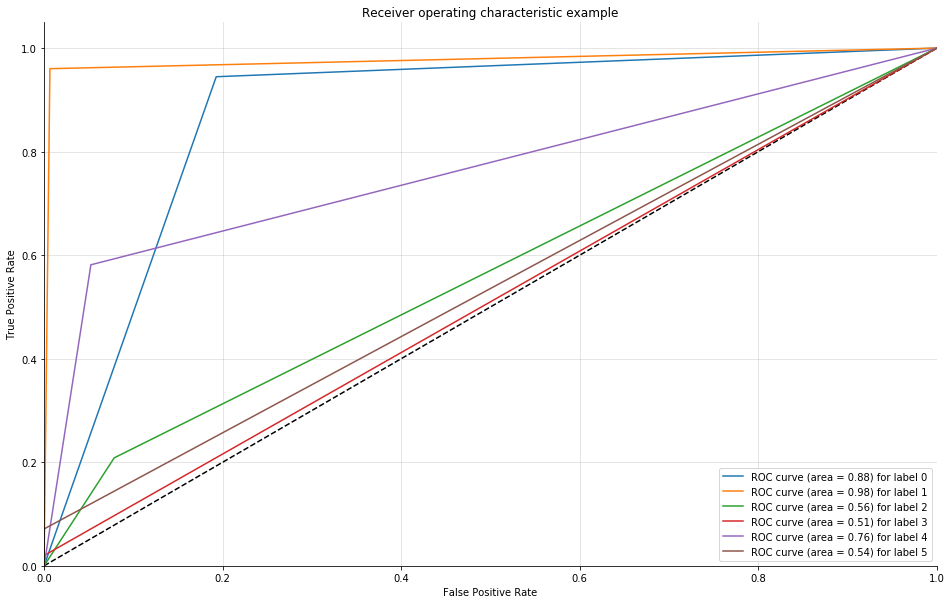

In [15]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

def plot_multiclass_roc(y_result, y_test, n_classes, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_roc = label_binarize(y_test, classes=[0, 1, 3, 5, 6, 7])
    y_result_roc = label_binarize(y_result, classes=[0, 1, 3, 5, 6, 7])
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_result_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(result, y_testknn, n_classes=6, figsize=(16, 10))

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[13354    10   433     2   336     1]
 [    0   338     1     9     0     4]
 [  823     1   354     1   519     0]
 [    0    47     0     1     0     0]
 [    0     0   878     1  1221     0]
 [    0    60     0     5     0     5]]


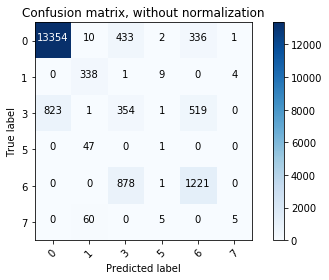

In [17]:
cnf_matrix = metrics.confusion_matrix(y_testknn, result,labels=[0, 1, 3, 5, 6, 7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 3, 5, 6, 7],
                      title='Confusion matrix, without normalization')